<a href="https://colab.research.google.com/github/ahmedlila/Reproduce-ML-Labs/blob/main/Lab3_LinearRegression_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> This notebook was created by [$\text{Ahmed Elsayed Lila}$](https://www.linkedin.com/in/ahmedlila/)


<h1> <font color='00bfff'>  $\text{Table of Contents: }$ </h1> </font>

- Introduction To Linear Regression 
- Mathematical Background 
    - Simple Linear Regression 
    - Multiple Linear Regression
    - Metrics:
        - Mean Absolute Error (MAE)
        - Mean Square Error (MSE)
        - $R^2$ (Coefficient of determination) 
    - Algorithms to solve Linear Regression (Optimization problem) [Normal Equation]
- Practice Time 
- Later on!
- Questions
- References



<h1> <font color='00bfff'>  $\text{Introduction to Linear Regression: }$ </h1> </font>

<center> <img src="https://drive.google.com/uc?export=view&id=1RVq0LBM24CdVzaoK0q407kvHdI-m1ojN" alt="LR Meme"> </center> 

<h5><font color='1E90FF'>$\otimes$ What is the meaning of Regression?</font><h5>
<h5><font color='228B22'>$\Rightarrow$ A statistical technique that relates a dependent variable to one or more independent variables by fitting a linear equation to the observed data.</font><h5>
<h5> <b><font color='FF8C00'>$\Rightarrow$ Example:</b> Predicting a person's salary (dependent variable) based on their years of experience (independent variable).</font><h5>

$$
\text{dependent variable} = \left\{
\begin{array}{cl}
\text{response variable}\\
\text{predicted variable}\\
\text{target variable}
\end{array}
\right.
$$

$$
\text{independent variable} = \left\{
\begin{array}{cl}
\text{explanatory variable}\\
\text{predictor variable}\\
\text{regressor variable}
\end{array}
\right.
$$

<br> </br>
<h5><font color='1E90FF'>$\otimes$ Why do we study old/naive technique?</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Foundational knowledge: Old techniques provide the foundation for many modern statistical methods.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Simplicity: Old techniques are often simpler and easier to interpret than newer, more complex methods.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Generalizations: Many advanced techniques can be seen as generalizations of simpler techniques.</font><h5>
<h5> <b><font color='FF8C00'>$\Rightarrow$ Example:</b> Lasso, Ridge, and ElasticNet Regression Methods.</font><h5>
<br> </br>
<h5><font color='1E90FF'>$\otimes$ Assumptions: </font><h5>
<h5><font color='228B22'>$\Rightarrow$ Linearity: There is a linear relationship between the dependent variable and the independent variable(s).</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Independence: The observations are independent of each other.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Homoscedasticity: The variance of the errors is constant across all levels of the independent variable(s).</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Normality: The errors are normally distributed with a mean of zero.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ No multicollinearity: There is no high correlation between the independent variables.</font><h5>

---
---


<h1> <font color='00bfff'>  $\text{Mathematical Background: }$ </h1> </font>

<font color = 'red'  size='4'> <b>Caution: </b> I adopted the notation convention as ESL (Which is followed by [An Introduction to Statistical Learning](https://www.statlearning.com/)). </font>

<font color = 'limegreen'  size='4'>$\text{1. Simple Linear Regression}$</font>

Mathematically, we can write this linear relationship as: 

$$Y \approx  \beta_0 +\beta_1*X$$
<h4><center> $X$ is called the <b><em>predictor</b></em> or the <b><em>independent</b></em> variable.</center>
<h4><center> $Y$ is called the <b><em>response</b></em> or the <b><em>dependant</b></em> variable.</center>
<br></br>

<font color = 'limegreen'  size='5'>$ϵ$</font> is an error term that encompasses all sources of variability in Y unaccounted for in our model by X.
<center> $Y =  \beta_0 +\beta_1*X + \epsilon$  </center> 


We can describe the above equation by saying that **we are regressing Y on X** (or Y onto X). $\beta_0$ (intercept) and  $\beta_1$ (slope) are two unknown constants that known as the model coeffcients or parameters.

$$\hat{y} \approx  \hat{\beta_0} +  \hat{\beta_1} * x $$



<br></br> 
<font color = 'FF8C00'  size='4'> <b>Caution: </b> $\hat{y}$ indicates a prediction of Y on the basis of X = x. We can use a hat symbol '^' to denote the estimated value for an unknown parameter or coeffcient, or to denote the predicted value of the response. </font> 

---

### Use Case

$\text{The Advertising dataset.}$ The plot displays <font color = 'limegreen'  size='3'>$sales$</font>, in thousands of units, as a function of <font color = 'limegreen'  size='3'>$TV$</font>, <font color = 'limegreen'  size='3'>$radio$</font>, and <font color = 'limegreen'  size='3'>$\text{newspaper}$</font> budgets, in thousands of dollars, for 200 different markets. In each plot we show the simple least squares fit of sales to that variable

<div> 
<center> <img src="https://drive.google.com/uc?export=view&id=10BIocImktqPIvsrWQAV3sNK3An3OgAKj" alt="usecase"> </center> </div>

Suppose that in our role as statistical consultants we are asked to suggest,
on the basis of this data, a marketing plan for next year that will result in
high product sales. $\text{What information would be useful in order to provide
such a recommendation?}$
<br> </br>
<font color = 'limegreen'  size='4'>$\text{Here are a few important questions that we might seek to address:}$</font>

<font color = '0099FF'  size='3'>$\text{(Checking the Relationship/Association)}$</font>  
- Is there a relationship between advertising budget and sales?
- Which media are associated with sales?

<font color = '0099FF'  size='3'>$\text{(Strength of the Relationship/Association)}$</font>  
- How strong is the relationship between advertising budget and sales?
- How large is the association between each medium and sales?

<font color = '0099FF'  size='3'>$\text{(Accuracy of Prediction)}$</font>  
- How accurately can we predict future sales?



---

<font color = 'limegreen'  size='4'>$\text{2. Multiple Linear Regression}$</font>

- We have multiple predictor variables 
- One option is to run three separate simple linear regressions, each of
which uses a di
erent advertising medium as a predictor.
- better approach is to extend the simple linear regression model
(3.5) so that it can directly accommodate multiple predictors.

However, the approach of fitting a separate simple linear regression model
for each predictor is not entirely satisfactory. First of all, it is unclear how to make a single prediction of sales given the three advertising media budgets, since each of the budgets is associated with a separate regression equation. Second, each of the three regression equations ignores the other two media in forming estimates for the regression coecients.



In general, suppose that we have p distinct predictors. Then the multiple linear regression model takes the form:

$$Y =  \beta_0 +\beta_1*X_1  +\beta_2*X_2 +... +\beta_p*X_p  + \epsilon$$
- $\hat{y}$ is the predicted value.
- $p$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $\beta_j$ is the $j^{th}$ model parameter (including the bias term $\beta_0$ and the feature weights $\beta_1, \beta_2, ..., \beta_p$ ).

<br> </br>
In Machine Learning, vectors are often represented as column vectors, which are 2D
arrays with a single column. If θ and x are column vectors, then the prediction is $\hat{y} = X \hat{\beta}$
- shape of $\vec{\beta}$  is:
$$\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\cdots \\
\beta_p
\end{bmatrix}_{p \times 1}$$

- shape of $\vec{X}$ is:

$$\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix}_{n \times p}$$
<center><i> $n$ samples & $p$ features. (Vectors are by default represented as columns.) </i></center> 

<br> </br> 
<font color='FF8C00'>**Caution**: <ol>when We're adding the $\beta_0$ to our calculation, we should add column of ones. Since the $\beta_0$ is the  inetrcept, We need to set column of ones to state it in every observation coming into our model.</ol>
<ol>Don't spend much time on understandign the multiplication of matrices here, it is mentioned differently in multiple of books, just make sure the output contains list of n results according to n observations.</ol> 


---

<font color = '0099FF'>$\text{Our goal is to obtain coefficient estimates (Model Weights) $\beta_0$ and  $\beta_1$ such that the resulting line is as close as possible to the number of instances $n$}$</font>  


<center> $\hat{y_i} \approx \hat{\beta_0} + \hat{\beta_1} * x_i \quad \forall i \in {1,2,...,n}$ </center> 

The most common approach involves minimizing the **least squares criterion** 
Then $e_i = y_i − \hat{y_i}$ represents the $i^{th}$ residual. this is the difference between the $i^{th}$ observed response value and the $i^{th}$ response value that is predicted by our linear model.

We define the residual sum of squares (RSS) as the following:

$$RSS = e_1^2 + e_1^2 + ... + e_n^2 $$

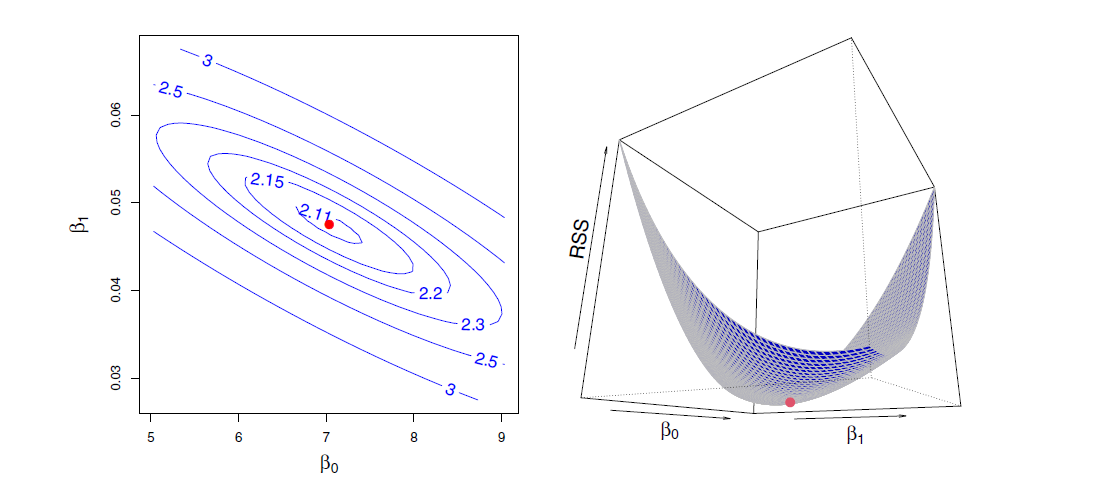


---
<h5> <ins><font color='salmon'>Residual Sum of Squares:</ins></font><h5>
<center> <font color = '0099FF' size='2'>$\text{Measures the unexplained variability or error in the regression model.}$</font> </center> 
$$ RSS = \sum_{i=1}^n (y_i - \hat{y_i})^2 $$

<h5> <ins><font color='salmon'>Total Sum of Squares:</ins></font><h5>
<center> <font color = '0099FF' size='2'>$\text{Measures the total variability in the response variable, regardless of whether it is explained by the model or not.}$</font> </center> 
<center> $TSS = \sum_{i=1}^n (y_i - \bar{y})^2 $  </center> 


<h5> <ins><font color='salmon'>The R-squared measure (Coefficient of determination):</ins></font><h5>
<center> <font color = '0099FF' size='2'>$\text{$R^2$ measures the proportion of variability in Y that can be explained using X.}$</font> </center> 
<center> $R^2 = 1- \frac{RSS}{TSS}$   </center> 


An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response is explained by the regressor (a strong correlation). A number near 0 indicates that the regressor does not explain much of the variability in the response; this might occur because of problems in the model construction, or when the error variance <font color = 'limegreen'  size='4'>$\sigma^2$</font> is high, or both.
<center> <img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/themes/1033380/settings_images/0v9AjBxvRzGePpXKxy3F_r2_explained.png" alt="R2 Visualization"> </center> 

$$R^2 \text{ Visualization: Showing RSS and TSS of Simple Linear Regression.} $$



---
<font color = 'limegreen'  size='4'>$\text{3. Metrics:}$</font>

Metrics help us evaluate how well a model is performing on a particular task.

$$
\text{Regression Famous Metrics} = \left\{
\begin{array}{cl}
\text{Mean Squared Error (MSE)}\\
\text{Root Mean Squared Error (RMSE)}\\
\text{R-squared (R2)}\\
\text{Adjusted R-squared (Adjusted R2)}\\
\text{Mean Absolute Error (MAE)}\\
\text{Explained Variance Score (EVS)}
\end{array}
\right.
$$
<br> </br>

<h5> <font color='limegreen'>$\text{MSE cost function:}$</font><h5>

$$\text{MSE}(X, h_\beta) = \frac{1}{n} 
\sum_{i=1}^n 
( x_i\beta - {y_i})^2 $$


<h5> <font color='limegreen'>$\text{MAE cost function:}$</font><h5>


$$\text{MAE}(X, h_\beta) = \frac{1}{n} 
\sum_{i=1}^n |x_i\beta - {y_i}|$$

---
<h5> <b><font color='1E90FF'>When to use MAE:</b> </font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to measure the average magnitude of the errors in your predictions.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to avoid giving more weight to larger errors. </font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you have outliers in your data that could skew the results with MSE.
 </font><h5>

<h5> <b><font color='1E90FF'>When to use MSE:</b> </font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to measure the average squared difference between the predicted and actual values.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to penalize larger errors more heavily than smaller errors.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you don't have outliers in your data that could skew the results with MAE.</font><h5>


<h5> <b><font color='1E90FF'>When to use R-squared:</b> </font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to measure how well the model fits the data.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want to compare different models to see which one fits the data better.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ When you want a single metric to represent the overall performance of the model.</font><h5>

<h5> <b><font color='1E90FF'>Can we use combinations of metrics?</b> </font><h5>
<h5><font color='228B22'>$\Rightarrow$ Use MAE and MSE together to get a better understanding of the size and magnitude of the errors in your predictions.
</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Use R-squared along with MAE or MSE to evaluate the overall fit of the model and also understand the specific magnitude or size of the errors.</font><h5>
<h5><font color='228B22'>$\Rightarrow$ Use a combination of metrics to compare different models and identify which one performs the best on multiple criteria.</font><h5>







___
<font color = 'limegreen'  size='4'>$\text{4. The Normal Equation:}$</font>

A closed-form solution represented in mathematical equation that finds the value of $\beta$ that minimizes the cost function.
<center> $\hat{\beta} = (X^T X)^{-1} X^T y$</center> 

- $\hat{\beta}$ is the value of $\beta$ that minimizes the cost function.
- $y$ is the vector of target values containing $y_1$ to $y_n$ for $n$ observations.

<h5> <font color='limegreen'>$\text{Computational Complexity:}$</font><h5>
The Normal Equation computes the inverse of $X^T X$, which is an $(n + 1) \times (n + 1)$ matrix (where n is the number of features). The computational
complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$,
depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4} = 5.3$ to $2^3 = 8$
<br> </br> 

---

<font color='FF8C00'>**Caution**: <ol> The SVD approach used by Scikit-Learn’s LinearRegression class is about $O(n^2)$.</ol> 
<ol> $x_i$ refers to a specific column vector of the input data matrix $X$ in the notation adopted.</ol> </font>


# <font color='00bfff'>  $\text{Practice Time 😃  }$</font>


### <font color = 'limegreen'>$\text{1. Introduction:  }$</font>


In [ ]:
from sklearn.preprocessing import add_dummy_feature
# get the function docstring 
print(f'\033[32m{add_dummy_feature.__doc__}\033[0m')

Augment dataset with an additional dummy feature.

    This is useful for fitting an intercept term with implementations which
    cannot otherwise fit it directly.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Data.

    value : float
        Value to use for the dummy feature.

    Returns
    -------
    X : {ndarray, sparse matrix} of shape (n_samples, n_features + 1)
        Same data with dummy feature added as first column.

    Examples
    --------
    >>> from sklearn.preprocessing import add_dummy_feature
    >>> add_dummy_feature([[0, 1], [1, 0]])
    array([[1., 0., 1.],
           [1., 1., 0.]])
    


In [ ]:
import numpy as np

# '@' is the matrix multiplication operator in Python
# A (3x2)
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# B (2x2)
B = np.array([[7, 8],
              [9, 10]])
# C output should be (3x2)
C = A @ B

print(C)

[[ 25  28]
 [ 57  64]
 [ 89 100]]



Let's Assume a simple linear equation as follows:
$$Y=4+3X+\epsilon \quad $$
$ \epsilon$ is a random float number between 0 and 1 


$$ 
\begin{bmatrix}
y_0 \\ 
y_1 \\ 
y_2 \\ 
\cdots \\ 
y_n
\end{bmatrix}_{n \times 1} = \quad
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{n} 
\end{bmatrix}_{n \times 2} 
\begin{bmatrix}
\beta_0 \\ 
\beta_1 
\end{bmatrix}_{2 \times 1} + \begin{bmatrix}
\epsilon_0 \\ 
\epsilon_1 \\ 
\epsilon_2 \\ 
\cdots \\ 
\epsilon_n
\end{bmatrix}_{n \times 1} $$

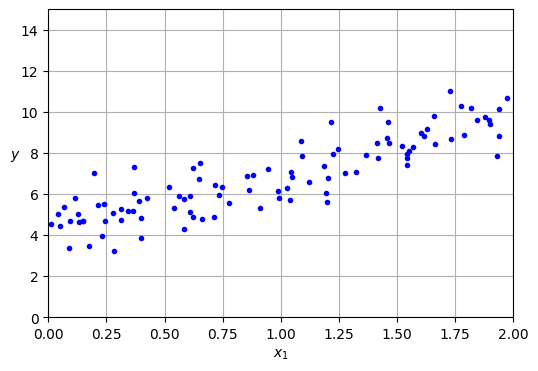

In [ ]:
# The Normal Equation
import numpy as np
import matplotlib.pyplot as plt

# Setting our equation 
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
intercept = 4
X = 2 * np.random.rand(m, 1) # multiplying by 2 to scale [0,1] to [0,2] range of generated numbers
y = intercept + 3 * X + np.random.randn(m, 1) # column vector

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

### <font color = 'limegreen'>$\text{2. Solution: Normal Equation  }$</font>




In [ ]:
# fitting model using the normal equation
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

# y = x_0*intercept + x_1*feature_1 = [1 x_1] [intercept feature_1]^T
beta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # model weights
print(f'Normal Equation weights: {beta_best}')

Normal Equation weights: [[4.21509616]
 [2.77011339]]


In [ ]:
# testing - predict 
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ beta_best
y_predict

array([[4.21509616],
       [9.75532293]])

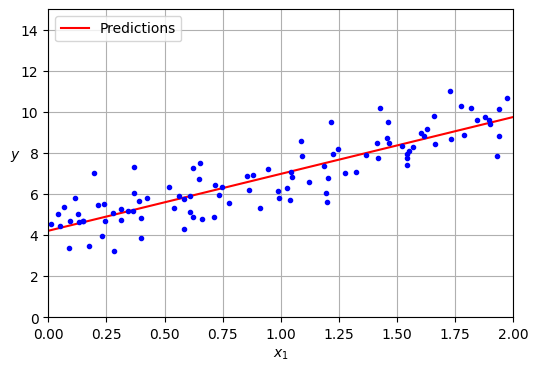

In [ ]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

### <font color = 'limegreen'>$\text{3. Solution: SVD using Scikit-learn [built in]  }$</font>


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
print(f'Model weights (SVD Approach): {lin_reg.intercept_, lin_reg.coef_}')

Model weights (SVD Approach): (array([4.21509616]), array([[2.77011339]]))


In [ ]:
y_predict_svd = lin_reg.predict(X_new)
y_predict_svd

array([[4.21509616],
       [9.75532293]])

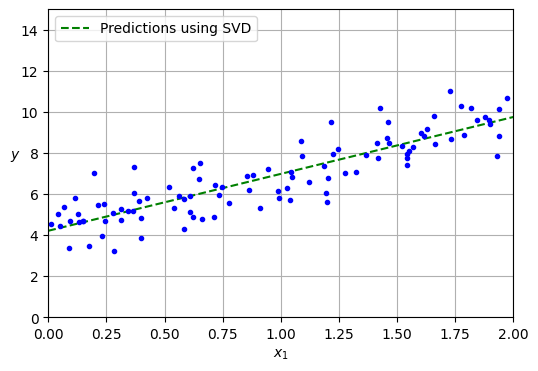

In [ ]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict_svd, "g--", label="Predictions using SVD")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Linear Regression (SVD Approach) weights: (array([4.21509616]), array([[2.77011339]]))


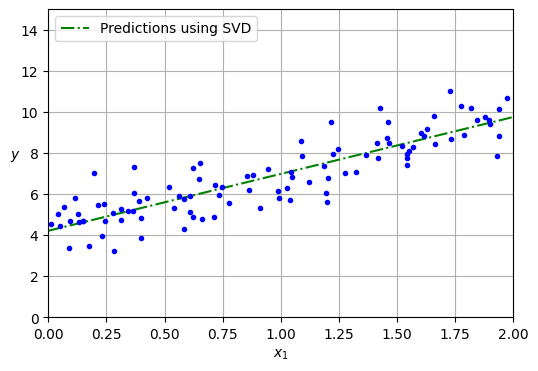

In [ ]:
#@title Try it out!
#@markdown NOTE: Play with the settings to get different results

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Setting our equation 
np.random.seed(42)  # to make this code example reproducible
no_of_observations = 100 #@param {type:"slider", min:100, max:10000, step:100}
intercept = 4 #@param {type:"slider", min:0, max:20, step:1}
slope = 3 #@param {type:"slider", min:0, max:10, step:1}

X = 2 * np.random.rand(no_of_observations, 1) # multiplying by 2 to scale [0,1] to [0,2] range of generated numbers
y = intercept + slope * X + np.random.randn(no_of_observations, 1) # column vector

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
print(f'Linear Regression (SVD Approach) weights: {lin_reg.intercept_, lin_reg.coef_}')

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
y_predict_svd = lin_reg.predict(X_new)
plt.plot(X_new, y_predict_svd, "g-.", label="Predictions using SVD")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

---
### <font color = 'ffcc99'>$\text{Important Note:}$</font>
More practice cells will be included to the next notebook Insha'Allah. It is difficult to elaborate all the below topics in one notebook to gain the reader attention! 
After gaining more knowledge about: Subset Selection, Shrinkage Methods, Learning Curves, and Polynomial Regression. It will be logical to start applying what we learned on a dataset. 

---

# <font color='00bfff'>  $\text{Later on! }$</font>

<font color = '0099FF'  size='3'>$\text{I didn't add more topics in this notebook to avoid elongation, however, If there is a part 2 of this topic, I will include:}$</font>  

- Different Solutions of LR:
    - Batch Gradient Decsent 
    - Stochastic Gradient Decsent 
    - Mini-Batch Gradient Descent
- Subset Selection 
- Shrinkage Methods 
- Learning Curves 
- Polynomial Regression (Non-Linear Regression)

<font color='FF8C00'>**Caution**: <ol> Statistical measures like $\text{p-value}$, $\text{t-statistic}$, and $\text{f-statistic}$ are used in linear regression to test the significance of the estimated regression coefficients. **To be studied on statistical inference course.**


---

# <font color='00bfff'>  $\text{Questions: }$</font>


<h5> <b><font color='1E90FF'>Q1:</b> Does it make sense for the multiple regression to suggest no relationship between feature_1 and feature_2 while the simple linear regression implies the
opposite?</font><h5>
<h5> <b><font color='228B22'> Answer:</b> When the relationship between the response variable and one predictor variable can depend on the value of the other predictor variable.</font><h5>

<h5> <b><font color='FF8C00'>Example:</b> Suppose we are interested in predicting the price of a house based on its size and the number of bedrooms. We might expect that larger houses with more bedrooms are generally more expensive. However, it's possible that the effect of house size on price depends on the number of bedrooms, and vice versa. For instance, a larger house with fewer bedrooms might be less expensive than a smaller house with more bedrooms.

In this case, if we were to perform a simple linear regression for each predictor separately, we might find that each predictor is significantly related to the response variable. However, when we perform multiple linear regression, we might find that the relationship between the two predictors and the response variable changes when we take into account the influence of the other predictor variable. It's possible that the combined effect of both predictors on the response variable is not significant or that the effect of one predictor variable is canceled out by the other predictor variable.</font><h5>

Reference: Intro to Statistical Learning Page 74.

---

<h5> <b><font color='1E90FF'>Q2:</b> What is the method of estimation in Linear Regression?  </font><h5>
<h5> <b><font color='228B22'> Answer:</b> The method of ordinary least squares (OLS) is a statistical technique used for estimating the relationship between a dependent variable and one or more independent variables. It involves finding the line of best fit that minimizes the sum of the squared differences between the predicted values and the actual values.</font><h5>

---

<h5> <b><font color='1E90FF'>Q3:</b> What is Adjusted R-squared? </font><h5>
<h5> <b><font color='228B22'> Answer:</b> Adjusted R-squared is a modification of the R-squared statistic that adjusts for the number of predictor variables in a linear regression model. The adjusted R-squared statistic adjusts the R-squared value by penalizing for the number of predictor variables in the model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.</font><h5>

$$ R^2 Adjusted = 1 -  \frac{(1 - R^2) *(n - 1)}{(n - p - 1)}$$

<h5> <b><font color='FF8C00'>Drawback: </b>R-squared alone does not take into account the number of predictor variables in the model. As the number of predictor variables increases, the R-squared value will tend to increase even if the additional variables do not add much explanatory power to the model. This can lead to overfitting, where the model fits the training data well but does not generalize well to new data.


---

# <font color='00bfff'>  $\text{References: }$</font>

- [An Introduction to Statistical Learning](https://www.statlearning.com/) Book
- [Hands-On ML notebooks by Ageron](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb) 
